In [1]:
import pandas as pd
import glob
import os
import openpyxl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import csv

In [2]:
dropbox_dir = "/Users/kendraziegler/Dropbox (Palmer Lab)"
#dropbox_dir = "C:/Users/cocoy/Dropbox (Palmer Lab)"

meta_dir = dropbox_dir + "/Suzanne_Mitchell_U01/Data-locomotor"


## Loading in raw data for C01-C07

In [3]:
#Creating one dataframe with all locomotor files
#Must manually unzip all folders
#Must combine locomotor 5 files from T1&T2 and T3&T4 into one file named comprehensive_output_files
#Will not be doing analysis on C06 or C07
cohorts_dir = ['Shipment1_locomotor',
               'Shipment2_locomotor',
               'Shipment3_locomotor',
               'Shipment4_locomotor',
               'Shipment5_locomotor',
               'Shipment6_locomotor',
               'ShipR_locomotor']

zip_folder = ['U01_Shipment1_Locomotor/comprehensive-output-files/',
              'U01_Shipment2_Locomotor/S2-comprehensive-output-files/',
              'U01-Shipment3_Locomotor/S3-comprehensive-out-files/',
              'comprehensive_output_files/comprehensive_output_files/',
              'comprehensive-output-files/',
              'Ship6-comprehensive-output-files/S6-comprehensive-out-files/',
              'R-comprehensive-output-files/R-comprehensive-output-files/']
dir_dict = {cohorts_dir[i]: zip_folder[i] for i in range(len(cohorts_dir))}
count = 0
df_excel = pd.DataFrame()
df_csv = pd.DataFrame()
for cohort_dir,zip_folder in dir_dict.items():
        #for cohort in cohort_list:
        raw_dir = meta_dir + "/" + cohort_dir + "/" + zip_folder
        os.chdir(raw_dir)
        for file in os.listdir(raw_dir):
            if file.endswith('.xlsx'):
                df_excel = df_excel.append(pd.read_excel(file), ignore_index=True)
            elif file.endswith('.csv'):
                input_file = pd.read_csv(file, skiprows = 58)
                df_csv_date = pd.read_csv(file, skiprows=53, nrows=1)
                rows = list(df_csv_date)
                #print(df_csv_date)
                date = rows[1]
                date = pd.to_datetime(date).date()
                #print(date)
                input_file['date'] = date
                #print(date)
                df_csv = df_csv.append(input_file, ignore_index=True)

                
df_csv
#print(count)

,EXPERIMENT,CAGE,SUBJECT ID,SUBJECT TYPE,SUBJECT SEX,SUBJECT AGE,SUBJECT TREATMENT,BATCH,PHASE,SAMPLE,...,LEFT-FRONT TIME LEGACY (s),RIGHT-FRONT TIME LEGACY (s),LEFT-REAR TIME LEGACY (s),RIGHT-REAR TIME LEGACY (s),MARGIN TIME LEGACY (s),CENTER TIME LEGACY (s),MARGIN DISTANCE LEGACY (cm),CENTER DISTANCE LEGACY (cm),Unnamed: 44,date
0,U01-t1-gp5,Cage 1,46179,9-black,Unknown,11,NaN,Batch 1,Phase 1,1,...,1.00,1.88,0.00,1.06,35.51,24.49,100.72,131.26,NaN,2018-12-20
1,U01-t1-gp5,Cage 1,46179,9-black,Unknown,11,NaN,Batch 1,Phase 1,2,...,0.00,0.00,0.00,6.47,47.35,12.65,152.35,103.79,NaN,2018-12-20
2,U01-t1-gp5,Cage 1,46179,9-black,Unknown,11,NaN,Batch 1,Phase 1,3,...,0.75,0.00,0.00,0.33,35.38,24.62,127.90,204.45,NaN,2018-12-20
3,U01-t1-gp5,Cage 1,46179,9-black,Unknown,11,NaN,Batch 1,Phase 1,4,...,0.00,0.00,0.00,7.55,40.35,19.66,61.70,114.53,NaN,2018-12-20
4,U01-t1-gp5,Cage 1,46179,9-black,Unknown,11,NaN,Batch 1,Phase 1,5,...,0.00,0.28,0.00,1.81,38.65,21.35,76.74,153.27,NaN,2018-12-20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22090,U01-t1-gp27,Cage 4,24857,5-black,Unknown,12,NaN,Batch 1,NaN,11,...,0.00,0.00,0.00,45.56,59.44,0.56,91.80,19.89,NaN,2020-10-10
22091,U01-t1-gp27,Cage 4,24857,5-black,Unknown,12,NaN,Batch 1,NaN,12,...,0.02,0.00,0.02,27.28,47.66,12.34,97.26,149.42,NaN,2020-10-10
22092,U01-t1-gp27,Cage 4,24857,5-black,Unknown,12,NaN,Batch 1,NaN,13,...,0.00,0.08,0.08,28.05,48.20,11.80,138.02,133.71,NaN,2020-10-10
22093,U01-t1-gp27,Cage 4,24857,5-black,Unknown,12,NaN,Batch 1,NaN,14,...,0.00,0.00,0.00,50.78,60.00,0.00,8.25,0.00,NaN,2020-10-10


In [4]:
#concat dataframes to be one. C07 added to other cohorts
#df_csv = pd.concat([df_csv,df_excel_r])
#df_csv_r.loc[df_csv_r['SUBJECT ID'] == 24688]

## Initial Formatting

In [5]:
def format_df_csv(df_csv):
    #make column headers uniform
    df_csv.columns = df_csv.columns.str.replace(':','')
    df_csv.columns = df_csv.columns.str.replace(' ','_')
    df_csv.columns = df_csv.columns.str.lower()
    
    df_csv.rename(columns={'subject_id':'rfid','duration_(s)':'duration','total_distance_(cm)':'total_distance',
                           'total_distance_x-axis_(cm)':'total_distance_x','total_distance_y-axis_(cm)':
                           'total_distance_y','rest_time_(s)':'rest_time','movement_time_(s)':'movement_time',
                           'ambulatory_time_(s)':'ambulatory_time','stereotypy_time_(s)':'stereotypy_time',
                           'vertical_activity_time_(s)':'vertical_activity_time','ambulatory_episode_average_velocity_(cm/s)':
                           'ambulatory_episode_average_velocity','ambulatory_episode_peak_average_velocity_(cm/s)':
                           'ambulatory_episode_peak_average_velocity','ambulatory_episode_median_velocity_(cm/s)':
                           'ambulatory_episode_median_velocity','left-front_time_legacy_(s)':'left-front_time_legacy',
                           'right-front_time_legacy_(s)':'right_front_time_legacy','counter-clockwise_revolutions':
                           'counter_clockwise_revolutions','left-rear_time_legacy_(s)':'left_rear_time_legacy',
                           'right-rear_time_legacy_(s)':'right_rear_time_legacy','margin_time_legacy_(s)':
                           'margin_time_legacy','center_time_legacy_(s)':'center_time_legacy','margin_distance_legacy_(cm)':
                           'margin_distance_legacy','center_distance_legacy_(cm)':'center_distance_legacy'},inplace = True)
    
    #Remove uneccesary columns
    #Below: column header(only value contained in column)
    #subject_sex(unknown), subject_treatment(NaN),unnamed_44(NaN),batch(batch 1), duration(60)
    df_csv.drop(['subject_sex', 'subject_treatment','unnamed_44','batch','duration'], axis=1, inplace = True)
    
    return df_csv
    

df_csv = format_df_csv(df_csv)



In [6]:
#Change rfid into a string
def reformat(df, columns):
    for col in columns:
        df[col] = df[col].astype(str)
        df[col] = [val.replace('.0','') for val in df[col]]
        
reformat(df_csv, ["rfid"])

#Load in master sheet in order to get the cohort value
#dropbox_dir = r'C:/Users/cocoy/Dropbox (Palmer Lab)/Palmer Lab/Shae Ziegler/Suzanne_Mitchell_U01'
dropbox_dir = r'/Users/kendraziegler/Dropbox (Palmer Lab)/Palmer Lab/Shae Ziegler/Suzanne_Mitchell_U01'
#creat last_5 column in order to compare with locomotor files
df_wfu = pd.read_csv(dropbox_dir + '/wfu_master.csv')
df_wfu['rfid'] = df_wfu['rfid'].astype(str)
df_wfu['last_5'] = df_wfu['rfid'].str.replace('9330003200','')
df_wfu['last_5'] = df_wfu['last_5'].str.replace('9330003201','')
df_wfu

#Take the cohort value from the wfu and map it to the locomotor df
def locomotor_cohort(df_csv):
    #create an empty column for cohort for the locomotor df
    df_csv["cohort"] = np.nan        


    #loop through each rfid in wfu master table
    for i in df_wfu['last_5']:
        #find the index of the rfid
        a = df_wfu.loc[df_wfu['last_5'] == i].index[0]
        #find the cohort of the rfid
        b = df_wfu.iloc[a]['cohort']
        #print(a,b,df_csv['rfid'] == i)
        #find all the indeces that have that rfid in locomotor df
        #df_csv.loc[df_csv['rfid'] == i,'cohort'] = b
        df_csv.loc[df_csv['rfid'] == i,'cohort'] = b


locomotor_cohort(df_csv)
df_csv[["rfid", "cohort"]]
#df_groups.cohort.value_counts()

,rfid,cohort
0,46179,C01
1,46179,C01
2,46179,C01
3,46179,C01
4,46179,C01
...,...,...
22090,24857,C07
22091,24857,C07
22092,24857,C07
22093,24857,C07


## Specific Error Corrections for Mitchell 2022

In [7]:
#All error corrections


#87713 is in C05 but cannot be found in wfu_master
#87713 is a typo and should be 87173
#missing_cohort = locomotor_all[locomotor_all['cohort'].isna()]
#locomotor_all[locomotor_all['rfid'] == '933000320187173']
def fix_rfid(df):
    df['rfid'] = df['rfid'].astype(str)
    df.loc[(df.rfid == '87713'),'rfid'] = '87173'
    df.loc[(df.rfid == '87173'),'cohort'] = 'C05'

#need to remove 933000320046763 from file U01-t2-gp13; rat had tail injury in first file
#file U01-t2-gp13-B contains the correct data for rat
#will remove 15 rows from table
def remove_incorrect(df):
    df['rfid'] = df['rfid'].astype(str)
    df.drop(df.loc[(df.experiment == 'U01-t2-gp13') & (df.rfid == '46763')].index, inplace = True)
    
#There is no U01-t1-gp2 in C05. Assume U01-t1-gp2a is its replacement
def file_rename(df):
    df.loc[(df.experiment == 'U01-t1-gp2a'),'experiment'] = 'U01-t1-gp2'
    #extra_file = locomotor_all[locomotor_all['experiment'] == 'U01-t1-gp2a']def file_rename(df):
    
def file_rename_2(df):
    df.loc[(df.experiment == 'U01-t2-gp21') & (df.cohort == 'C05'),'experiment'] = 'U01-t1-gp21'
    df.loc[(df.experiment == 'U01-t2a-gp21'),'experiment'] = 'U01-t2-gp21'
    return df
    
def file_rename_3(df):
    df.loc[(df.experiment == 'U01-t2-gp22') & (df.cohort == 'C05'),'experiment'] = 'U01-t1-gp22'
    df.loc[(df.experiment == 'U01-t2a-gp22'),'experiment'] = 'U01-t2-gp22'
    return df

def file_rename_4(df):
    t2_files = ['U01-t2-gp21','U01-t2-gp22','U01-t2-gp23','U01-t2-gp24',"U01-t2-gp25"]
    t2_new_files = ['U01-t1-gp21','U01-t1-gp22','U01-t1-gp23','U01-t1-gp24','U01-t1-gp25']
    t3_files = ['U01-t3-gp21','U01-t3-gp22',"U01-t3-gp23",'U01-t3-gp24','U01-t3-gp25']
    t3_new_files = ['U01-t2-gp21','U01-t2-gp22','U01-t2-gp23','U01-t2-gp24','U01-t2-gp25']
    t2_files = dict(zip(t2_files, t2_new_files))
    t3_files = dict(zip(t3_files, t3_new_files))
    for key,value in t2_files.items(): 
        df.loc[(df.experiment == key) & (df.cohort == 'C06'),'experiment'] = value
    for key,value in t3_files.items():
        df.loc[(df.experiment == key)& (df.cohort == 'C06'),'experiment'] = value
    return df

#change file u01-t2-gp6 rfid 46057 to 46059 in C01   
def rfid_rename(df):
    df['rfid'] = df['rfid'].astype(str)
    df.loc[(df.experiment == 'U01-t2-gp6')&(df.rfid == '46059'),'rfid'] = '46057'
    
remove_incorrect(df_csv)
fix_rfid(df_csv)
file_rename(df_csv)
df_csv = file_rename_2(df_csv)
df_csv = file_rename_3(df_csv)
df_csv = file_rename_4(df_csv)
rfid_rename(df_csv)


## Creating columns based on file name

In [9]:
def splitting_cells(df):
    df['cage'] = df['cage'].str.replace('Cage ','')
    #df['phase'] = df['phase'].str.replace('Phase ','')
    #split cell based on -
    df['U01'] = df.experiment.str.split('-', expand = True)[0]
    df['time'] = df.experiment.str.split('-', expand = True)[1]
    df['file_num'] = df.experiment.str.split('-', expand = True)[2]

splitting_cells(df_csv)

## Rename and Reorder Columns 

In [10]:
def format_for_calc(df_csv):
    #drop uneeded columns for calc
    #U01 contains part of title I manually split, uneeded
    #subject_type is incorrect coat color naming
    #subject_age are incorrec values
    #phase and start time provides no useful info
    df = df_csv.drop(['U01','subject_type','subject_age','start_time','phase'], axis=1)
    #reorganize columns
    df = df[['experiment','cohort', 'rfid', 'time',
       'file_num', 'sample','cage','date', 'total_distance', 'total_distance_x',
       'total_distance_y', 'horizontal_activity_count',
       'ambulatory_activity_count', 'rest_time', 'rest_episode_count',
       'movement_time', 'movement_episode_count', 'ambulatory_time',
       'ambulatory_episode_count', 'stereotypy_time',
       'stereotypic_episode_count', 'stereotypic_activity_count',
       'stereotypic_episode_activity_count', 'vertical_episode_count',
       'vertical_activity_count', 'vertical_activity_time', 'jump_count',
       'clockwise_revolutions', 'counter_clockwise_revolutions',
       'ambulatory_episode_average_velocity',
       'ambulatory_episode_peak_average_velocity',
       'ambulatory_episode_median_velocity', 'left-front_time_legacy',
       'right_front_time_legacy', 'left_rear_time_legacy',
       'right_rear_time_legacy', 'margin_time_legacy', 'center_time_legacy',
       'margin_distance_legacy', 'center_distance_legacy']]
    #Drop rows that will not be used for calculations: t3, t4 according to Mitchell
    df.drop(df.loc[df['time']=='t3'].index, inplace=True)
    df.drop(df.loc[df['time']=='t4'].index, inplace=True)

    return df


locomotor = format_for_calc(df_csv)


## Drop columns that are not desired by Mitchell's team

In [11]:
def drop_unwanted(locomotor):
    #all the following were decided as unwanted by mitchells team
    locomotor = locomotor.drop(labels=[ 'total_distance_x',
 'total_distance_y',
 'horizontal_activity_count',
 'ambulatory_activity_count',
 'movement_time',
 'ambulatory_time',
 'ambulatory_episode_count',
 'stereotypy_time',
 'stereotypic_episode_count',
 'stereotypic_activity_count',
 'stereotypic_episode_activity_count',
 'vertical_episode_count',
 'vertical_activity_time',
 'jump_count',
 'clockwise_revolutions',
 'counter_clockwise_revolutions',
 'ambulatory_episode_average_velocity',
 'ambulatory_episode_peak_average_velocity',
 'ambulatory_episode_median_velocity',
 'left-front_time_legacy',
 'right_front_time_legacy',
 'left_rear_time_legacy',
 'right_rear_time_legacy',
 'margin_time_legacy',
 'margin_distance_legacy',
 'center_distance_legacy'], axis=1)
    return locomotor
    
locomotor = drop_unwanted(locomotor)
list(locomotor.columns.values)

['experiment',
 'cohort',
 'rfid',
 'time',
 'file_num',
 'sample',
 'cage',
 'date',
 'total_distance',
 'rest_time',
 'rest_episode_count',
 'movement_episode_count',
 'vertical_activity_count',
 'center_time_legacy']

## Separate for Locomotor t1 and Locomotor t2

In [12]:
locomotor_t1 = locomotor[locomotor.time == 't1']
locomotor_t1 = locomotor_t1.add_prefix('locomotor_t1_')
locomotor_t1.rename(columns={'locomotor_t1_rfid':'rfid','locomotor_t1_cage':'locomotor_cage',
                             'locomotor_t1_sample':'sample','locomotor_t1_cohort':'cohort'},inplace = True)


In [13]:
locomotor_t2 = locomotor[locomotor.time == 't2']
locomotor_t2 = locomotor_t2.add_prefix('locomotor_t2_')
locomotor_t2.rename(columns={'locomotor_t2_rfid':'rfid','locomotor_t2_cage':'locomotor_cage',
                             'locomotor_t2_sample':'sample','locomotor_t2_cohort':'cohort'},inplace = True)


## Merge Locomotor 1 and Locomotor 2

In [14]:
locomotor_all = pd.merge(locomotor_t1, locomotor_t2, on=['rfid','sample','cohort'],how = 'outer')

locomotor_all

,locomotor_t1_experiment,cohort,rfid,locomotor_t1_time,locomotor_t1_file_num,sample,locomotor_cage_x,locomotor_t1_date,locomotor_t1_total_distance,locomotor_t1_rest_time,...,locomotor_t2_time,locomotor_t2_file_num,locomotor_cage_y,locomotor_t2_date,locomotor_t2_total_distance,locomotor_t2_rest_time,locomotor_t2_rest_episode_count,locomotor_t2_movement_episode_count,locomotor_t2_vertical_activity_count,locomotor_t2_center_time_legacy
0,U01-t1-gp5,C01,46179,t1,gp5,1,1,2018-12-20,231.98,5.13,...,t2,gp5,1,2018-12-21,197.07,12.09,7.0,8.0,109.0,37.96
1,U01-t1-gp5,C01,46179,t1,gp5,2,1,2018-12-20,256.13,6.10,...,t2,gp5,1,2018-12-21,220.00,13.81,8.0,9.0,90.0,28.41
2,U01-t1-gp5,C01,46179,t1,gp5,3,1,2018-12-20,332.35,3.64,...,t2,gp5,1,2018-12-21,139.18,16.31,10.0,11.0,56.0,4.89
3,U01-t1-gp5,C01,46179,t1,gp5,4,1,2018-12-20,176.24,15.63,...,t2,gp5,1,2018-12-21,0.00,48.72,16.0,17.0,92.0,0.00
4,U01-t1-gp5,C01,46179,t1,gp5,5,1,2018-12-20,230.01,6.02,...,t2,gp5,1,2018-12-21,187.76,19.39,12.0,12.0,91.0,8.36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9550,NaN,C07,24864,NaN,NaN,11,NaN,NaN,NaN,NaN,...,t2,gp27,3,2020-10-11,179.48,14.74,9.0,9.0,102.0,3.30
9551,NaN,C07,24864,NaN,NaN,12,NaN,NaN,NaN,NaN,...,t2,gp27,3,2020-10-11,87.36,39.63,16.0,15.0,68.0,0.70
9552,NaN,C07,24864,NaN,NaN,13,NaN,NaN,NaN,NaN,...,t2,gp27,3,2020-10-11,18.01,45.78,13.0,12.0,48.0,0.00
9553,NaN,C07,24864,NaN,NaN,14,NaN,NaN,NaN,NaN,...,t2,gp27,3,2020-10-11,1.00,55.41,3.0,3.0,30.0,0.00


## Group 15 minute sessions into one row

In [15]:
#need to calculate total for each rfid at each time
df_groups = locomotor_all.groupby([ 'rfid','cohort','locomotor_cage_x','locomotor_t1_date','locomotor_t1_experiment','locomotor_t1_time',
                                   'locomotor_t1_file_num','locomotor_t2_date','locomotor_t2_time','locomotor_t2_file_num',
                                   'locomotor_t2_experiment'],
                                  as_index = False,dropna = False)[['sample',
                                                     'locomotor_t1_total_distance',
                                                     'locomotor_t1_rest_time',
                                                     'locomotor_t1_rest_episode_count',
                                                     'locomotor_t1_movement_episode_count',
                                                     'locomotor_t1_vertical_activity_count',
                                                     'locomotor_t1_center_time_legacy',
                                                     'locomotor_t2_total_distance',
                                                     'locomotor_t2_rest_time',
                                                     'locomotor_t2_rest_episode_count',
                                                     'locomotor_t2_movement_episode_count',
                                                     'locomotor_t2_vertical_activity_count',
                                                     'locomotor_t2_center_time_legacy']].sum()


## Load in WFU Master to pull relevant data

### Change RFID to be a string

In [16]:
# #Change rfid into a string
# def reformat(df, columns):
#     for col in columns:
#         df[col] = df[col].astype(str)
#         df[col] = [val.replace('.0','') for val in df[col]]
        
# reformat(df_groups, ["rfid"])

In [17]:
# #Load in master sheet in order to get the cohort value
# #dropbox_dir = r'C:/Users/cocoy/Dropbox (Palmer Lab)/Palmer Lab/Shae Ziegler/Suzanne_Mitchell_U01'
# dropbox_dir = r'/Users/kendraziegler/Dropbox (Palmer Lab)/Palmer Lab/Shae Ziegler/Suzanne_Mitchell_U01'
# #creat last_5 column in order to compare with locomotor files
# df_wfu = pd.read_csv(dropbox_dir + '/wfu_master.csv')
# df_wfu['rfid'] = df_wfu['rfid'].astype(str)
# df_wfu['last_5'] = df_wfu['rfid'].str.replace('9330003200','')
# df_wfu['last_5'] = df_wfu['last_5'].str.replace('9330003201','')
# df_wfu

## Find the Cohort of the RFID

In [18]:
# #Take the cohort value from the wfu and map it to the locomotor df
# def locomotor_cohort(df_groups):
#     #create an empty column for cohort for the locomotor df
#     df_groups["cohort"] = np.nan        


#     #loop through each rfid in wfu master table
#     for i in df_wfu['last_5']:
#         #find the index of the rfid
#         a = df_wfu.loc[df_wfu['last_5'] == i].index[0]
#         #find the cohort of the rfid
#         b = df_wfu.iloc[a]['cohort']
#         #print(a,b,df_csv['rfid'] == i)
#         #find all the indeces that have that rfid in locomotor df
#         #df_csv.loc[df_csv['rfid'] == i,'cohort'] = b
#         df_groups.loc[df_groups['rfid'] == i,'cohort'] = b


# locomotor_cohort(df_groups)
# df_groups[["rfid", "cohort"]]
# #df_groups.cohort.value_counts()

## Find the DOB of the RFID

In [19]:
def locomotor_dob(df_groups):
    #create an empty column for cohort for the locomotor df
    df_groups["dob"] = np.nan        


    #loop through each rfid in wfu master table
    for i in df_wfu['last_5']:
        #find the index of the rfid
        a = df_wfu.loc[df_wfu['last_5'] == i].index[0]
        #find the cohort of the rfid
        b = df_wfu.iloc[a]['dob']
        #print(a,b,df_csv['rfid'] == i)
        #find all the indeces that have that rfid in locomotor df
        #df_csv.loc[df_csv['rfid'] == i,'cohort'] = b
        df_groups.loc[df_groups['rfid'] == i,'dob'] = b


locomotor_dob(df_groups)
df_groups[["rfid", "dob"]]
#df_groups.cohort.value_counts()

,rfid,dob
0,24653,2020-07-26
1,24661,2020-07-24
2,24662,2020-07-25
3,24667,2020-07-26
4,24669,2020-07-24
...,...,...
632,87442,2020-01-22
633,87443,2020-01-22
634,87448,2020-01-24
635,87449,2020-02-02


## Calculate the age at experiment

In [20]:
df_groups[['locomotor_t1_date','dob']] = df_groups[['locomotor_t1_date','dob']].apply(pd.to_datetime) 
df_groups[['locomotor_t2_date','dob']] = df_groups[['locomotor_t2_date','dob']].apply(pd.to_datetime) 
df_groups['locomotor_t1_age'] = (df_groups['locomotor_t1_date'] - df_groups['dob']).dt.days
df_groups['locomotor_t2_age'] = (df_groups['locomotor_t2_date'] - df_groups['dob']).dt.days
df_groups[['locomotor_t1_age','locomotor_t2_age']]

,locomotor_t1_age,locomotor_t2_age
0,78.0,79.0
1,78.0,79.0
2,79.0,80.0
3,76.0,77.0
4,80.0,81.0
...,...,...
632,156.0,157.0
633,156.0,157.0
634,154.0,155.0
635,147.0,148.0


## Find the Sex of the RFID

In [21]:
#Take the sex value from the wfu and map it to the locomotor df
def locomotor_sex(df_groups):
    #create an empty column for sex for the locomotor df
    df_groups["sex"] = np.nan

    #loop through each rfid in master table
    for i in df_wfu['last_5']:
        #find the index of the rfid
        a = df_wfu.loc[df_wfu['last_5'] == i].index[0]
        #find the sex of the rfid
        b = df_wfu.iloc[a]['sex']
        #print(b)
        #find all the indeces that have that rfid in locomotor df and update sex
        df_groups.loc[df_groups['rfid'] == i,'sex'] = b

        
locomotor_sex(df_groups)
#df_groups[["rfid", "sex"]]

## Coatcolor for RFID

In [22]:
#Take the coat color value from the wfu and map it to the locomotor df
def locomotor_coatcolor(df_groups):
    #create an empty column for coat color for the locomotor df
    df_groups["coatcolor"] = np.nan

    #loop through each rfid in master table
    for i in df_wfu['last_5']:
        #find the index of the rfid
        a = df_wfu.loc[df_wfu['last_5'] == i].index[0]
        #find the sex of the rfid
        b = df_wfu.iloc[a]['coatcolor']
        #print(b)
        #find all the indeces that have that rfid in locomotor df and update sex
        df_groups.loc[df_groups['rfid'] == i,'coatcolor'] = b

locomotor_coatcolor(df_groups)
#df_groups[["rfid", "coatcolor"]]

## Add full RFID

In [23]:
def correcting_rfid(df_groups):
    #change rfid to unclude all 15 digits
    #C01-C04 9330003200 else 9330003201
    cohort_list_1 = ['C01','C02','C03','C04']
    cohort_list_2 = ['C05','C06','C07']
    mislabled_rfid = ['933000320148051',
 '933000320148054',
 '933000320148056',
 '933000320148057',
 '933000320148059',
 '933000320148060',
 '933000320148065',
 '933000320148074',
 '933000320148176',
 '933000320148178',
 '933000320148179',
 '933000320148180',
 '933000320148183',
 '933000320148184',
 '933000320148185',
 '933000320148187',
 '933000320148188',
 '933000320148189',
 '933000320148190',
 '933000320148191',
 '933000320148192',
 '933000320148193',
 '933000320148194',
 '933000320148195',
 '933000320148197',
 '933000320148198',
 '933000320148199',
 '933000320148200',
 '933000320148226',
 '933000320148227',
 '933000320148228',
 '933000320148230',
 '933000320148231',
 '933000320148232',
 '933000320148233',
 '933000320148234',
 '933000320148235',
 '933000320148236',
 '933000320148237',
 '933000320148238',
 '933000320148239',
 '933000320148240',
 '933000320148241',
 '933000320148243',
 '933000320148244',
 '933000320148245',
 '933000320148246',
 '933000320148247',
 '933000320148248',
 '933000320148249',
 '933000320148250']
    df_mislabled = df_groups[df_groups['rfid'].isin(mislabled_rfid)]
    for i in cohort_list_1:
        df_groups.loc[(df_groups.cohort == i),'rfid']= '9330003200' + df_groups['rfid'].astype(str)
    for i in cohort_list_2:
        df_groups.loc[(df_groups.cohort == i),'rfid']= '9330003201' + df_groups['rfid'].astype(str)
 
    for rfid in mislabled_rfid:
        df_groups.loc[(df_groups.rfid == rfid),'rfid'] = df_groups['rfid'].str.replace('9330003201','')
        rfid = rfid.replace('9330003201','')
        df_groups.loc[(df_groups.rfid == rfid),'rfid'] = '9330003200' + df_groups['rfid'].astype(str)

correcting_rfid(df_groups)
#df_groups.rfid

In [24]:
#Correct 4 file experiment names. 
#'U01-t2-gp21', 'U01-t2-gp22' to 'U01-t1-gp21', 'U01-t1-gp22'
#'U01-t2a-gp21', 'U01-t2a-gp22' to 'U01-t2-gp21', 'U01-t2-gp22'
def correct_experiment(df_groups):
    old_name = ['U01-t2-gp21', 'U01-t2-gp22','U01-t2a-gp21', 'U01-t2a-gp22']
    new_name = ['U01-t1-gp21', 'U01-t1-gp22','U01-t2-gp21', 'U01-t2-gp22']
    for name in old_name: 
        index = old_name.index(name)
        df_groups.loc[(df_groups.locomotor_t2_experiment == name) & (df_groups.cohort == 'C05'),
                      'locomotor_t2_experiment'] = new_name[index]
correct_experiment(df_groups)

## Final Locomotor Formatting

In [25]:
df_zeroes = df_groups.copy()


In [26]:
a = df_zeroes[df_zeroes['rfid']=='933000320186970']
a[['cohort','rfid','locomotor_t2_experiment','locomotor_t1_experiment']]

,cohort,rfid,locomotor_t2_experiment,locomotor_t1_experiment
501,C05,933000320186970,U01-t1-gp21,U01-t1-gp21


In [27]:
def final_format(df_groups):
    df_groups = df_groups[['rfid', 'cohort', 'dob','sex','coatcolor', 'locomotor_cage_x', 'locomotor_t1_date',
       'locomotor_t1_experiment', 'locomotor_t1_time', 'locomotor_t1_file_num',
       'locomotor_t2_date', 'locomotor_t2_time', 'locomotor_t2_file_num',
       'locomotor_t2_experiment', 'sample', 'locomotor_t1_age',
       'locomotor_t2_age','locomotor_t1_total_distance',
       'locomotor_t1_rest_time', 'locomotor_t1_rest_episode_count',
       'locomotor_t1_movement_episode_count',
       'locomotor_t1_vertical_activity_count',
       'locomotor_t1_center_time_legacy', 'locomotor_t2_total_distance',
       'locomotor_t2_rest_time', 'locomotor_t2_rest_episode_count',
       'locomotor_t2_movement_episode_count',
       'locomotor_t2_vertical_activity_count',
       'locomotor_t2_center_time_legacy']]

    df_groups = df_groups.drop(labels=['locomotor_t1_experiment',
                                       'locomotor_t1_time',
                                       'locomotor_t1_file_num',
                                       'locomotor_t2_time',
                                       'locomotor_t2_file_num',
                                       'locomotor_t2_experiment',
                                       'locomotor_t2_date',
                                       'locomotor_t1_date',
                                       'sample'], axis=1)
    df_groups.columns=[it.replace('locomotor_cage_x','locomotor_cage') for it in df_groups.columns]
    return df_groups
    
df_groups = final_format(df_groups)
df_groups.columns

Index(['rfid', 'cohort', 'dob', 'sex', 'coatcolor', 'locomotor_cage',
       'locomotor_t1_age', 'locomotor_t2_age', 'locomotor_t1_total_distance',
       'locomotor_t1_rest_time', 'locomotor_t1_rest_episode_count',
       'locomotor_t1_movement_episode_count',
       'locomotor_t1_vertical_activity_count',
       'locomotor_t1_center_time_legacy', 'locomotor_t2_total_distance',
       'locomotor_t2_rest_time', 'locomotor_t2_rest_episode_count',
       'locomotor_t2_movement_episode_count',
       'locomotor_t2_vertical_activity_count',
       'locomotor_t2_center_time_legacy'],
      dtype='object')

## Graphing by Cohort

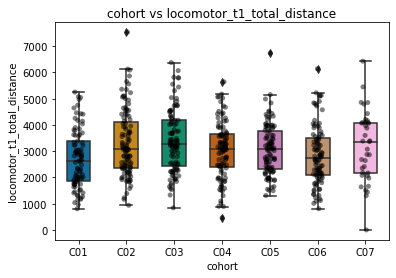

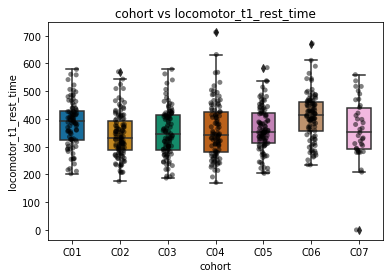

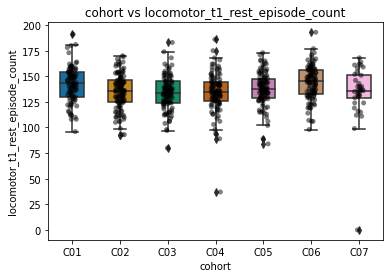

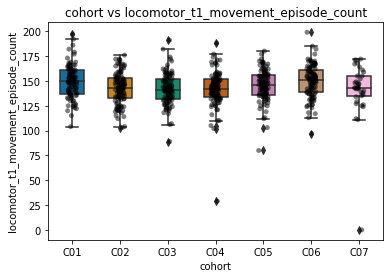

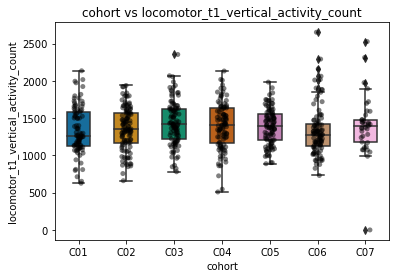

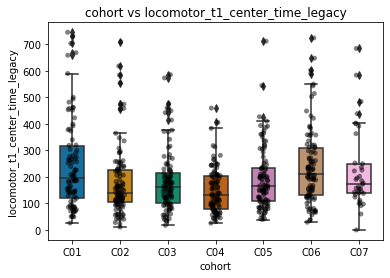

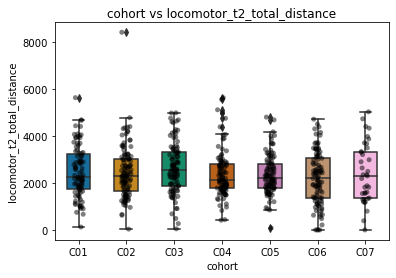

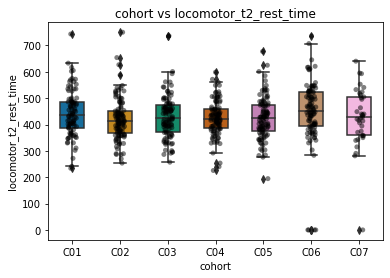

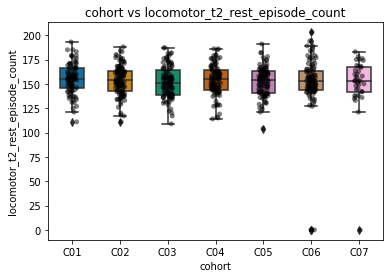

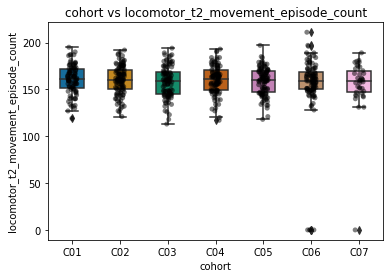

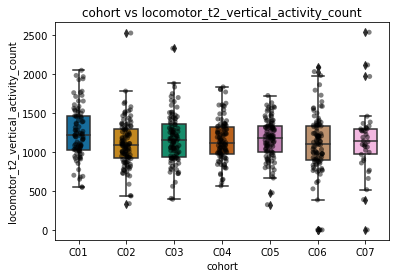

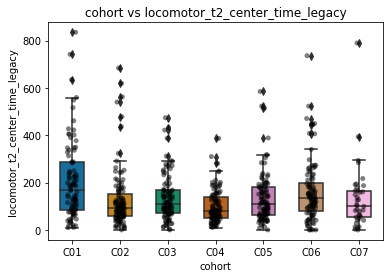

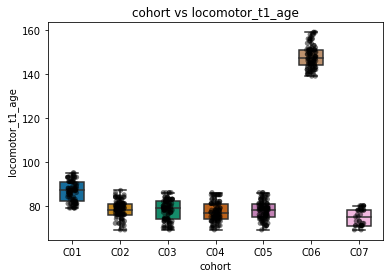

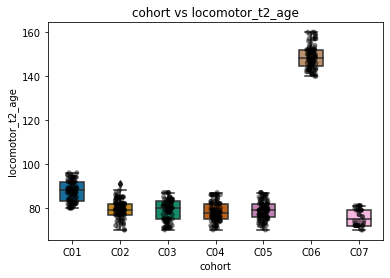

In [28]:
graph_columns = ['locomotor_t1_total_distance',
 'locomotor_t1_rest_time',
 'locomotor_t1_rest_episode_count',
 'locomotor_t1_movement_episode_count',
 'locomotor_t1_vertical_activity_count',
 'locomotor_t1_center_time_legacy',
 'locomotor_t2_total_distance',
 'locomotor_t2_rest_time',
 'locomotor_t2_rest_episode_count',
 'locomotor_t2_movement_episode_count',
 'locomotor_t2_vertical_activity_count',
 'locomotor_t2_center_time_legacy',
  'locomotor_t1_age', 'locomotor_t2_age']
order_bin = pd.value_counts(df_groups['cohort']).sort_index().index
for col in graph_columns:
    sns.boxplot(y = col, x ='cohort', 
                     data = df_groups, 
                     width = 0.5,
                     palette = "colorblind",
                order = order_bin)

    sns.stripplot(y = col, x ='cohort',
                        data=df_groups, 
                        jitter=True, 
                        marker='o', 
                        alpha=0.5,
                        color='black',
                 order = order_bin)
    plt.title('cohort vs ' + col)
    #plt.savefig(r'/Users/kendraziegler/Dropbox (Palmer Lab)/Palmer Lab/Shae Ziegler/Suzanne_Mitchell_U01/' + col + '_cohort.jpg')
    plt.show()


In [29]:
df_groups.locomotor_t1_age.value_counts().sort_index()

69.0      7
70.0     15
71.0     24
72.0     16
73.0     27
74.0     26
75.0     26
76.0     34
77.0     25
78.0     53
79.0     46
80.0     33
81.0     45
82.0     24
83.0     29
84.0     20
85.0     21
86.0     17
87.0     11
88.0      8
89.0      2
90.0      3
91.0      8
92.0      2
93.0      9
94.0      3
95.0      2
139.0     2
140.0     4
141.0     5
142.0     7
143.0     6
144.0     5
145.0     8
146.0     6
147.0     7
148.0     5
149.0     7
150.0     5
151.0    12
152.0     3
153.0     2
154.0     2
155.0     2
156.0     5
157.0     1
158.0     3
159.0     3
Name: locomotor_t1_age, dtype: int64

## Graphing by Cage

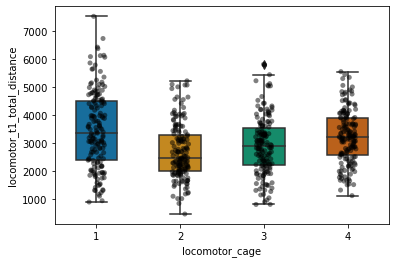

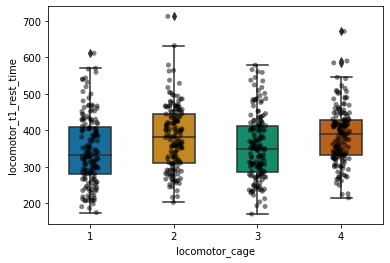

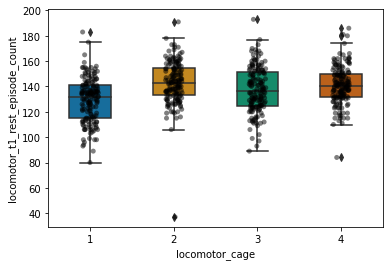

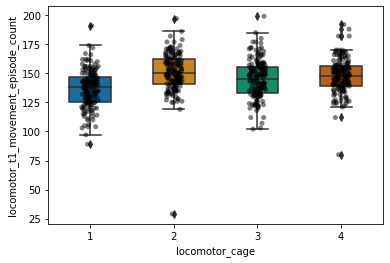

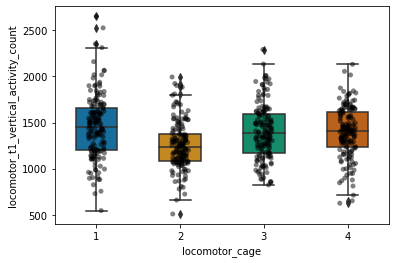

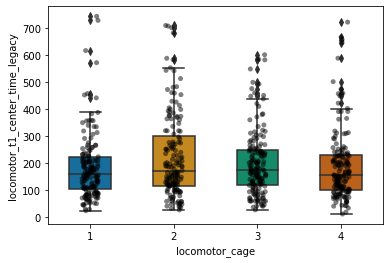

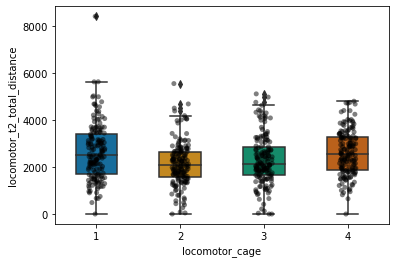

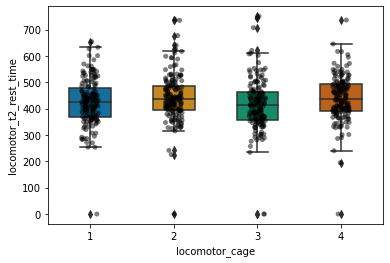

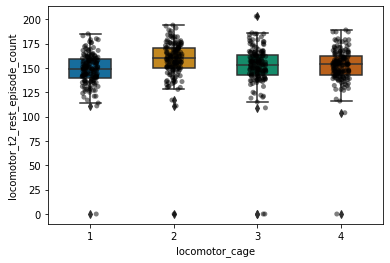

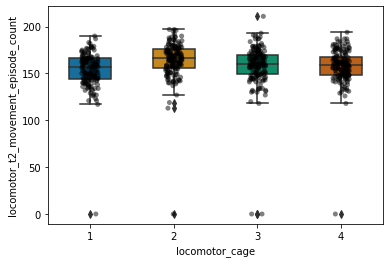

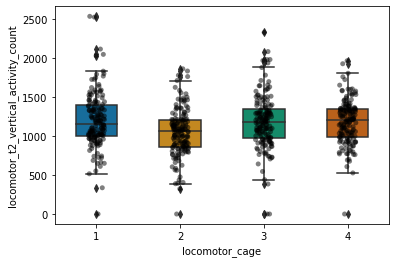

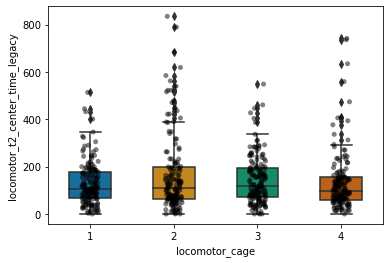

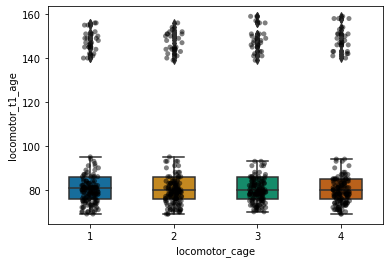

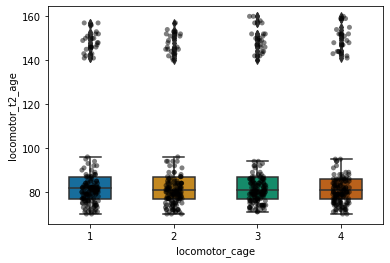

In [30]:

order_bin = pd.value_counts(df_groups['locomotor_cage']).sort_index().index

for col in graph_columns:
    sns.boxplot(y = col, x ='locomotor_cage', 
                     data = df_groups, 
                     width = 0.5,
                     palette = "colorblind",
               order = order_bin)

    sns.stripplot(y = col, x ='locomotor_cage',
                        data=df_groups, 
                        jitter=True, 
                        marker='o', 
                        alpha=0.5,
                        color='black',
                 order = order_bin)
    plt.show()

## Graphing by Sex

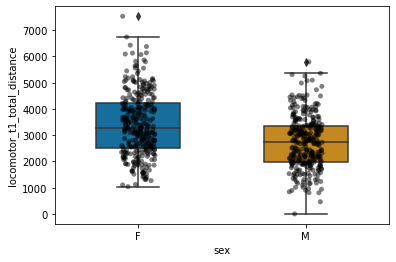

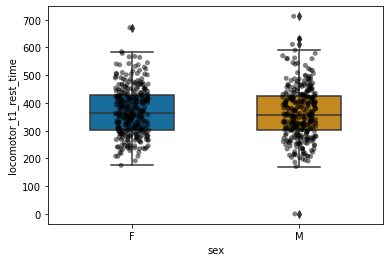

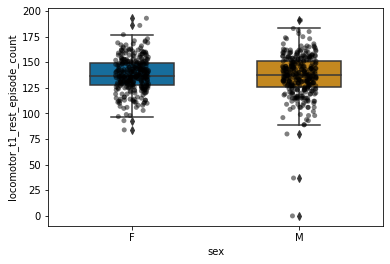

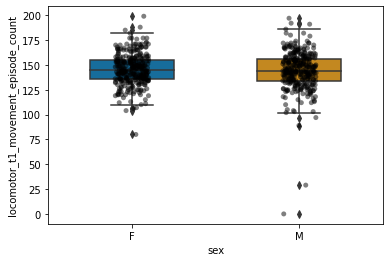

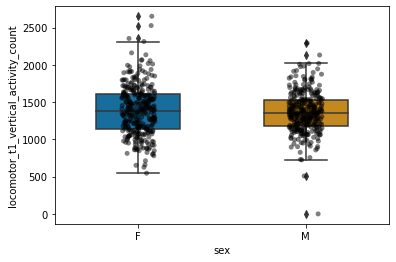

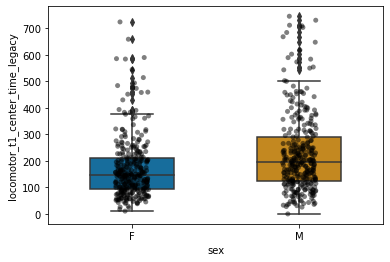

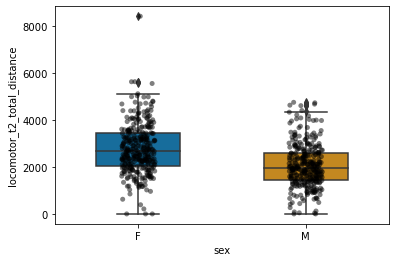

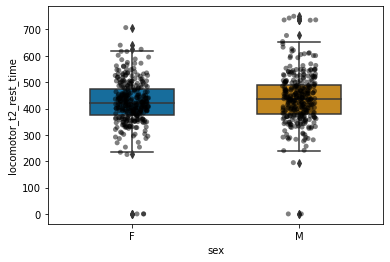

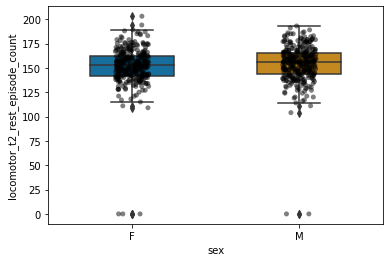

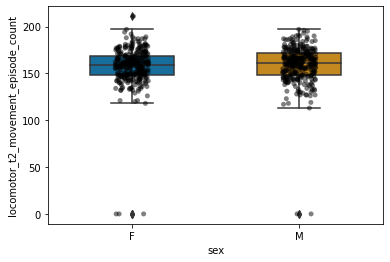

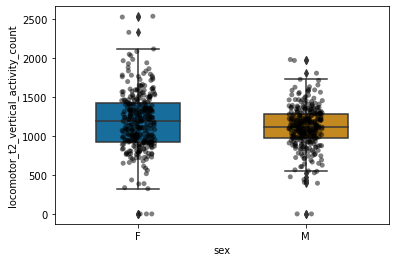

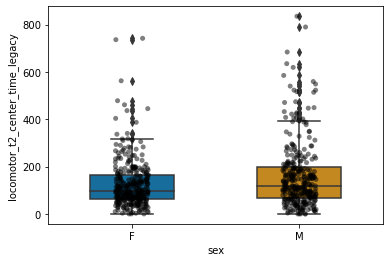

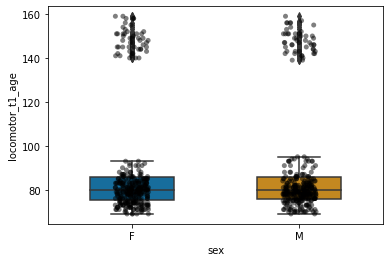

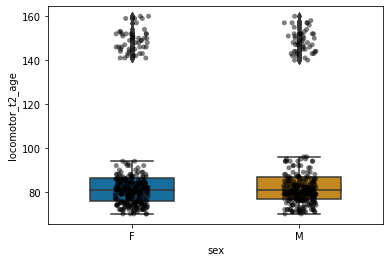

In [31]:

for col in graph_columns:
    sns.boxplot(y = col, x ='sex', 
                     data = df_groups, 
                     width = 0.5,
                     palette = "colorblind")

    sns.stripplot(y = col, x ='sex',
                        data=df_groups, 
                        jitter=True, 
                        marker='o', 
                        alpha=0.5,
                        color='black')
    plt.show()

## Graphing by Coatcolor

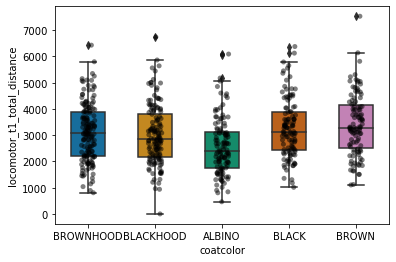

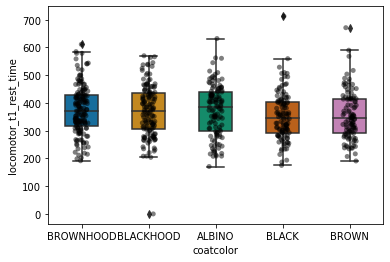

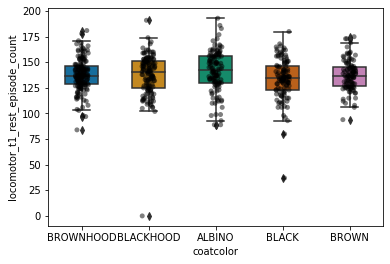

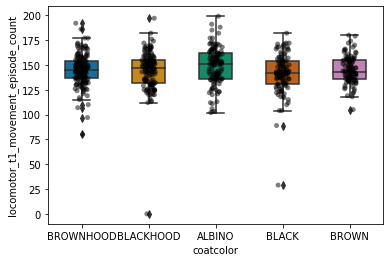

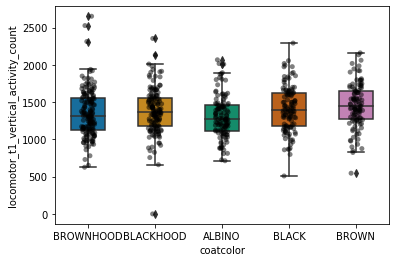

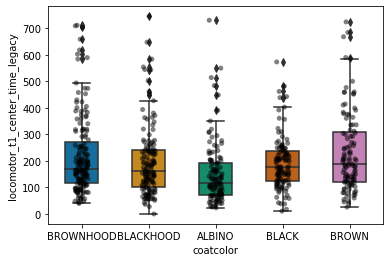

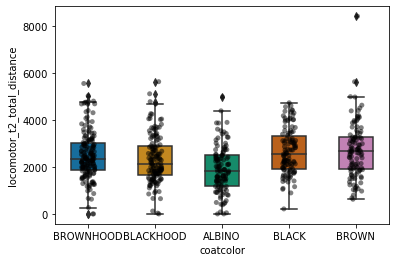

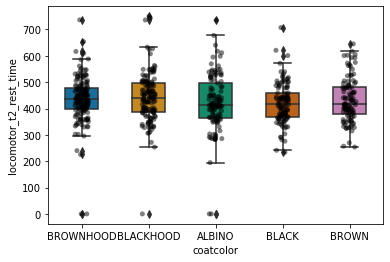

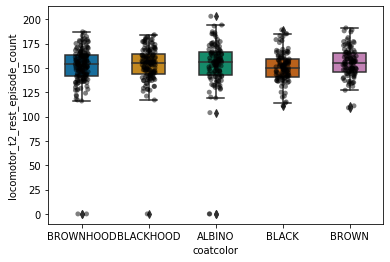

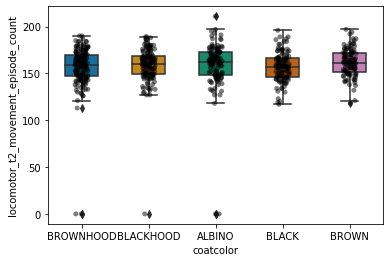

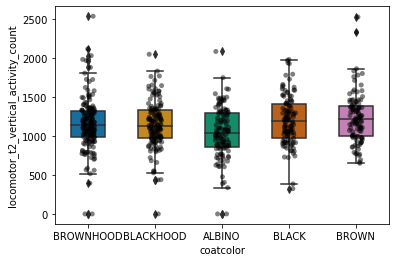

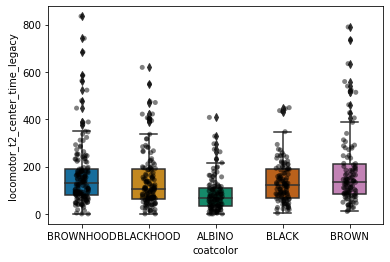

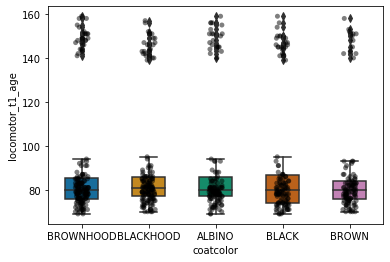

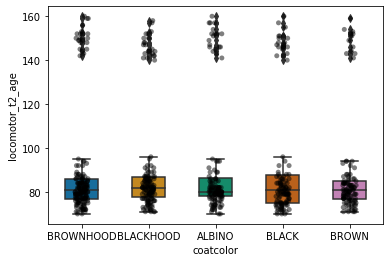

In [32]:

for col in graph_columns:
    sns.boxplot(y = col, x ='coatcolor', 
                     data = df_groups, 
                     width = 0.5,
                     palette = "colorblind")

    sns.stripplot(y = col, x ='coatcolor',
                        data=df_groups, 
                        jitter=True, 
                        marker='o', 
                        alpha=0.5,
                        color='black')
    plt.show()

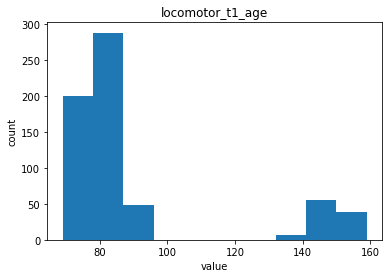

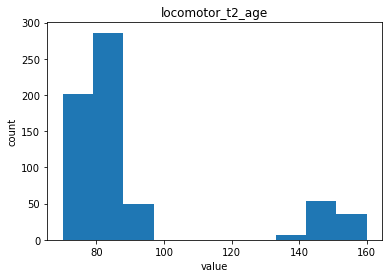

In [33]:
graph_columns = ['locomotor_t1_age','locomotor_t2_age']
for col in graph_columns:
    df = df_groups
    df = df[df[col].notnull()]
    plt.title(col)
    plt.xlabel('value')
    plt.ylabel('count')
    plt.hist(df[col])
    plt.show() 



In [34]:

#save locomotor file
#df_groups.to_csv(r'C:\Users\cocoy\Dropbox (Palmer Lab)\Palmer Lab\Shae Ziegler\Suzanne_Mitchell_U01\locomotor.csv', index=False)
df_groups.to_csv(r'/Users/kendraziegler/Dropbox (Palmer Lab)/Palmer Lab/Shae Ziegler/Suzanne_Mitchell_U01/locomotor.csv', index=False)


## Check the number of m/f per cage per cohort

In [35]:
#check sexes per cage

cohorts = ['C01','C02','C03','C04','C05','C06','C07']
cages = ['1','2','3','4']
values = {}

for cohort in cohorts:
    subset = df_groups[df_groups['cohort'] == cohort]
    for cage in cages:
        subset_cage = subset[subset['locomotor_cage'] == cage]
        for sex in ["M",'F']:
            subset_sex = subset_cage[subset_cage['sex'] == sex]
            key = cohort + '_' + str(cage) + '_' + sex
            values[key] = subset_sex.shape[0]
            #print(key,df_groups.shape)


values

{'C01_1_M': 17,
 'C01_1_F': 6,
 'C01_2_M': 17,
 'C01_2_F': 6,
 'C01_3_M': 8,
 'C01_3_F': 14,
 'C01_4_M': 8,
 'C01_4_F': 14,
 'C02_1_M': 11,
 'C02_1_F': 17,
 'C02_2_M': 11,
 'C02_2_F': 17,
 'C02_3_M': 14,
 'C02_3_F': 13,
 'C02_4_M': 14,
 'C02_4_F': 13,
 'C03_1_M': 13,
 'C03_1_F': 12,
 'C03_2_M': 13,
 'C03_2_F': 12,
 'C03_3_M': 12,
 'C03_3_F': 13,
 'C03_4_M': 12,
 'C03_4_F': 13,
 'C04_1_M': 15,
 'C04_1_F': 10,
 'C04_2_M': 15,
 'C04_2_F': 10,
 'C04_3_M': 10,
 'C04_3_F': 15,
 'C04_4_M': 10,
 'C04_4_F': 15,
 'C05_1_M': 10,
 'C05_1_F': 15,
 'C05_2_M': 10,
 'C05_2_F': 15,
 'C05_3_M': 15,
 'C05_3_F': 10,
 'C05_4_M': 15,
 'C05_4_F': 10,
 'C06_1_M': 10,
 'C06_1_F': 15,
 'C06_2_M': 10,
 'C06_2_F': 15,
 'C06_3_M': 15,
 'C06_3_F': 10,
 'C06_4_M': 15,
 'C06_4_F': 10,
 'C07_1_M': 3,
 'C07_1_F': 6,
 'C07_2_M': 3,
 'C07_2_F': 6,
 'C07_3_M': 5,
 'C07_3_F': 4,
 'C07_4_M': 6,
 'C07_4_F': 3}

In [36]:
t1_total_distance_0 = df_groups[df_groups['locomotor_t1_total_distance'] == 0]
t1_total_distance_0
#df_groups.to_csv(r'/Users/kendraziegler/Dropbox (Palmer Lab)/Palmer Lab/Shae Ziegler/Suzanne_Mitchell_U01/locomotor.csv', index=False)


,rfid,cohort,dob,sex,coatcolor,locomotor_cage,locomotor_t1_age,locomotor_t2_age,locomotor_t1_total_distance,locomotor_t1_rest_time,locomotor_t1_rest_episode_count,locomotor_t1_movement_episode_count,locomotor_t1_vertical_activity_count,locomotor_t1_center_time_legacy,locomotor_t2_total_distance,locomotor_t2_rest_time,locomotor_t2_rest_episode_count,locomotor_t2_movement_episode_count,locomotor_t2_vertical_activity_count,locomotor_t2_center_time_legacy
22,933000320124864,C07,2020-07-31,M,BLACKHOOD,NaN,NaN,72.0,0.0,0.0,0.0,0.0,0.0,0.0,1815.44,436.57,145.0,151.0,1084.0,81.65


In [37]:
#list(t2_total_distance_0.rfid)

In [38]:
t1_total_distance_0.cohort.value_counts()

C07    1
Name: cohort, dtype: int64

In [39]:
t2_total_distance_0 = df_groups[df_groups['locomotor_t2_total_distance'] == 0]
t2_total_distance_0
#t2_total_distance_0.to_csv(r'/Users/kendraziegler/Dropbox (Palmer Lab)/Palmer Lab/Shae Ziegler/Suzanne_Mitchell_U01/locomotor_t2_total_distance_0.csv', index=False)


,rfid,cohort,dob,sex,coatcolor,locomotor_cage,locomotor_t1_age,locomotor_t2_age,locomotor_t1_total_distance,locomotor_t1_rest_time,locomotor_t1_rest_episode_count,locomotor_t1_movement_episode_count,locomotor_t1_vertical_activity_count,locomotor_t1_center_time_legacy,locomotor_t2_total_distance,locomotor_t2_rest_time,locomotor_t2_rest_episode_count,locomotor_t2_movement_episode_count,locomotor_t2_vertical_activity_count,locomotor_t2_center_time_legacy
6,933000320124684,C07,2020-07-24,F,BLACKHOOD,3,78.0,NaN,2081.14,380.19,151.0,159.0,1416.0,143.98,0.0,0.0,0.0,0.0,0.0,0.0
466,933000320048227,C06,2020-01-26,F,BROWNHOOD,2,154.0,NaN,1362.10,455.91,171.0,177.0,933.0,144.36,0.0,0.0,0.0,0.0,0.0,0.0
481,933000320048244,C06,2020-01-25,F,ALBINO,1,155.0,NaN,2671.29,404.13,135.0,146.0,1180.0,167.74,0.0,0.0,0.0,0.0,0.0,0.0
612,933000320187417,C06,2020-02-03,M,BROWNHOOD,4,146.0,NaN,2185.62,446.82,162.0,168.0,1191.0,131.49,0.0,0.0,0.0,0.0,0.0,0.0
617,933000320187422,C06,2020-02-02,M,ALBINO,3,147.0,NaN,1489.90,453.36,157.0,165.0,1114.0,549.48,0.0,0.0,0.0,0.0,0.0,0.0


In [40]:
df_groups.columns

Index(['rfid', 'cohort', 'dob', 'sex', 'coatcolor', 'locomotor_cage',
       'locomotor_t1_age', 'locomotor_t2_age', 'locomotor_t1_total_distance',
       'locomotor_t1_rest_time', 'locomotor_t1_rest_episode_count',
       'locomotor_t1_movement_episode_count',
       'locomotor_t1_vertical_activity_count',
       'locomotor_t1_center_time_legacy', 'locomotor_t2_total_distance',
       'locomotor_t2_rest_time', 'locomotor_t2_rest_episode_count',
       'locomotor_t2_movement_episode_count',
       'locomotor_t2_vertical_activity_count',
       'locomotor_t2_center_time_legacy'],
      dtype='object')

In [41]:
df_groups.locomotor_cage.value_counts()

1    160
2    160
3    158
4    158
Name: locomotor_cage, dtype: int64

In [42]:
list(df_groups.rfid)

['933000320124653',
 '933000320124661',
 '933000320124662',
 '933000320124667',
 '933000320124669',
 '933000320124682',
 '933000320124684',
 '933000320124685',
 '933000320124688',
 '933000320124693',
 '933000320124694',
 '933000320124701',
 '933000320124715',
 '933000320124721',
 '933000320124724',
 '933000320124731',
 '933000320124734',
 '933000320124735',
 '933000320124750',
 '933000320124854',
 '933000320124857',
 '933000320124862',
 '933000320124864',
 '933000320124871',
 '933000320124873',
 '933000320124874',
 '933000320124878',
 '933000320124886',
 '933000320124891',
 '933000320124892',
 '933000320124893',
 '933000320124952',
 '933000320124963',
 '933000320124977',
 '933000320124979',
 '933000320124993',
 '933000320125000',
 '933000320045751',
 '933000320045756',
 '933000320045757',
 '933000320045759',
 '933000320045760',
 '933000320045761',
 '933000320045766',
 '933000320045768',
 '933000320045769',
 '933000320045772',
 '933000320045803',
 '933000320045804',
 '933000320045812',


In [43]:
df_wfu[df_wfu['last_5']=='87173']

,cohort,sires,dames,labanimalid,accessid,sex,rfid,dob,dow,shipmentdate,...,coatcolor,earpunch,rack,shipmentbox,housingbox,shipmentage,weanage,comments,resolution,last_5
105,C05,74842_1,74541_2,MIT442,75352_6,F,933000320187173,2019-12-24,2020-01-14,2020-02-04,...,BROWNHOOD,LTRM,E-F1,7.0,47.0,42.0,21.0,NaN,NaN,87173


In [44]:
df_groups.cohort.value_counts().sort_index()

C01     90
C02    110
C03    100
C04    100
C05    100
C06    100
C07     37
Name: cohort, dtype: int64